In [116]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

"""
Start with symmetric system and rank parameters by sensitivity. There is a lot of them!
"""


def hill_act(X, K, n):
    return X**n/(K**n + X**n)
def hill_inh(X, K, n):
    return K**n/(K**n + X**n)

def rhs(xyz, t, a, b, c, d, e, f, g, h, i, j, k, l, KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, 
        KM22, KM21, KM2x, KM2y, nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y):
    x, y1, y2, z1, z2 = xyz

    dx_dt = a - b * x
    dy1_dt = c * hill_act(x, KMxy1, nx) - d * y1
    dy2_dt = e * hill_act(x, KMxy2, nx) - f * y2
    dz1_dt = g * hill_act(x, KM1x, n1x) * hill_inh(y1, KM1y, n1y) - i * z1 + h * hill_act(z1, KM11, n11) * hill_inh(z2, KM12, n12)
    dz2_dt = j * hill_act(x, KM2x, n2x) * hill_inh(y2, KM2y, n2y) - l * z2 + k * hill_act(z2, KM22, n22) * hill_inh(z1, KM21, n21)
    
    return np.array([dx_dt, dy1_dt, dy2_dt, dz1_dt, dz2_dt])

# Define parameter values

# Initial conditions
initial_conditions = [0.0, 0.0, 0.0, 0.0, 0.0]

# Time points for integration
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
params = {
    'a': 9.0, 'b': 1.0, 'c': 10.0, 'd': 1.0, 'e': 10.0, 'f': 1.0, 'g': 10.0, 'h': 10.0, 'i': 0.5, 'j': 10.0,
    'k': 10.0, 'l': 0.5, 'KMxy1': 10.0, 'KMxy2': 10.0, 'KM11': 10.0, 'KM12': 1.0, 'KM1x': 10.0, 'KM1y': 5.0, 
    'KM22': 10.0, 'KM21': 1.0, 'KM2x': 10.0, 'KM2y': 5.0, 'nx': 2, 'n11': 2, 'n12': 2, 'n1x': 2, 'n1y': 2, 
    'n22': 2, 'n21': 2, 'n2x': 2, 'n2y': 2
}
# Integrate the ODEs
solution = solve_ivp(lambda t, y: rhs(y, t, **params), t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for z1 and z2
z1_solution = solution.y[3]
z2_solution = solution.y[4]

# Perform sensitivity analysis using finite differences
sensitivity_eps = 0.1
sensitivity_matrix = np.zeros((len(z1_solution), len(params)))

for i, param_name in enumerate(params):
    perturbed_params = params.copy()
    #perturbation = perturbed_params[param_name]*sensitivity_eps
    perturbation = 1e-6
    perturbed_params[param_name] += perturbation

    perturbed_solution = solve_ivp(lambda t, y: rhs(y, t, **perturbed_params), t_span, initial_conditions, t_eval=t_eval)
    perturbed_z1_solution = perturbed_solution.y[3]
    perturbed_z2_solution = perturbed_solution.y[4]

    sensitivity_matrix[:, i] = (abs(perturbed_z1_solution - z1_solution) + abs(perturbed_z2_solution - z2_solution)) / (2 * perturbation)

# Print or analyze the sensitivity results
print("Sensitivity Matrix:")
print(np.unravel_index(np.argmax(sensitivity_matrix), sensitivity_matrix.shape))
ordered_keys = np.argsort(sensitivity_matrix[-1,:])
print(ordered_keys)

Sensitivity Matrix:
(446, 8)
[ 7 10 18 14 27 23  0 28 24 26 30 29 25 15 19  2  4 22 12 13  6  9 20 16
 21 17  1  5  3  8 11]


<Figure size 640x480 with 0 Axes>

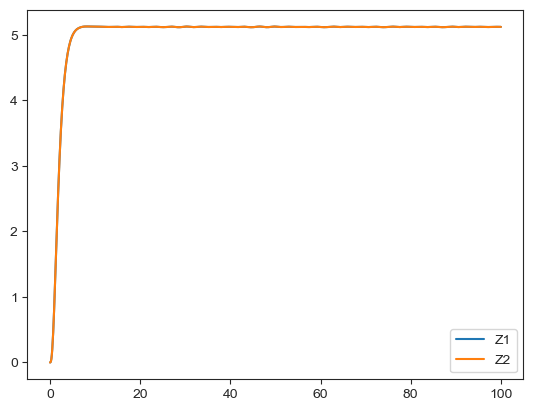

<Figure size 640x480 with 0 Axes>

In [117]:
plt.plot(t_eval, z1_solution)
plt.plot(t_eval, z2_solution)
plt.legend(['Z1', 'Z2'])
plt.figure()

New Dictionary:
act_Z1
act_Z2
KM22
KM11
n22
n11
prod_X
n21
n12
n1y
n2y
n2x
n1x
KM12
KM21
prod_Y1
prod_Y2
nx
KMxy1
KMxy2
XY_induce_Z1
XY_induce_Z2
KM2x
KM1x
KM2y
KM1y
deg_X
deg_Y2
deg_Y1
deg_Z1
deg_Z2


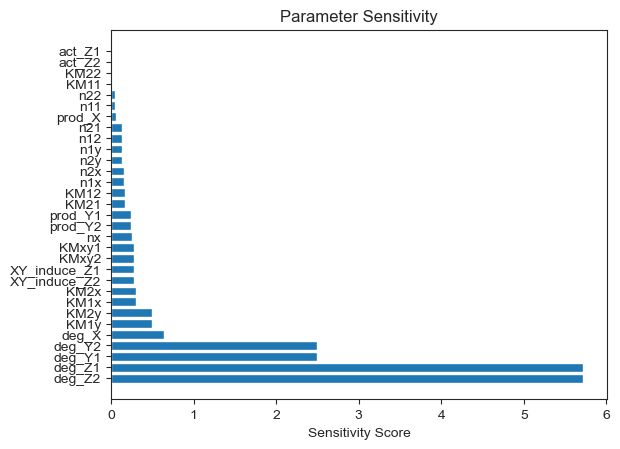

In [118]:
params = {
    'prod_X': 2.0, 'deg_X': 1.0, 'prod_Y1': 10.0, 'deg_Y1': 1.0, 'prod_Y2': 10.0, 'deg_Y2': 1.0, 
    'XY_induce_Z1': 10.0, 'act_Z1': 10.0, 'deg_Z1': 0.5, 'XY_induce_Z2': 10.0,
    'act_Z2': 10.0, 'deg_Z2': 0.5, 'KMxy1': 10.0, 'KMxy2': 10.0, 'KM11': 10.0, 'KM12': 1.0, 'KM1x': 10.0, 'KM1y': 5.0, 
    'KM22': 10.0, 'KM21': 1.0, 'KM2x': 10.0, 'KM2y': 5.0, 'nx': 2, 'n11': 2, 'n12': 2, 'n1x': 2, 'n1y': 2, 
    'n22': 2, 'n21': 2, 'n2x': 2, 'n2y': 2
}
reference = {i: key for i, key in enumerate(params)}
x_labels = []
print("New Dictionary:")
for key in ordered_keys:
    print(reference[key])
    x_labels.append(reference[key])
    
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(reference))

ax.barh(y_pos, np.sort(sensitivity_matrix[-1,:]), align='center')
ax.set_yticks(y_pos, labels=x_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Sensitivity Score')
ax.set_title('Parameter Sensitivity')

plt.show()

In [312]:
# import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

"""
Perturb parameter pairs and then eventually compare parameters vs slope of dx_dt (with the parameter a)
"""


def hill_act(X, K, n):
    return X**n/(K**n + X**n)
def hill_inh(X, K, n):
    return K**n/(K**n + X**n)

def rhs(xyz, t, a, b, c, d, e, f, g, h, i, j, k, l, KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, 
        KM22, KM21, KM2x, KM2y, nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y):
    x, y1, y2, z1, z2 = xyz

    dx_dt = a - b * x
    dy1_dt = c * hill_act(x, KMxy1, nx) - d * y1
    dy2_dt = e * hill_act(x, KMxy2, nx) - f * y2
    dz1_dt = g * hill_act(x, KM1x, n1x) * hill_inh(y1, KM1y, n1y) - i * z1 + h * hill_act(z1, KM11, n11) * hill_inh(z2, KM12, n12)
    dz2_dt = j * hill_act(x, KM2x, n2x) * hill_inh(y2, KM2y, n2y) - l * z2 + k * hill_act(z2, KM22, n22) * hill_inh(z1, KM21, n21)
    
    return np.array([dx_dt, dy1_dt, dy2_dt, dz1_dt, dz2_dt])

def calc(a, b):
    """
    Brute Force Monte Carlo Parameter Sensitivity Analysis
    """
    # Time points we want for the solution
    t = np.linspace(0, 10, 1000)
   
    # Initial condition
    xyz_0 = np.array([2.0, 2.0, 2.0, 0.0, 0.0])

    # Parameters
    b, c, d, e, f, g, h, i, j, k, l = [0.5, 10.0, 1.0, 10.0, 1.0, 10.0, 10.0, 0.5, b, 10.0, 0.5]
    nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y = [2, 2, 2, 2, 2, 2, 2, 2, 2]
    KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, KM22, KM21, KM2x, KM2y = [10.0, 10.0, 10.0, 10.0, 10.0, 5.0, 10.0, 2.5, 10.0, 10.0]


    # Integrate ODES
    xyz = integrate.odeint(rhs, xyz_0, t, args=(a, b, c, d, e, f, g, h, i, j, k, l, KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, 
        KM22, KM21, KM2x, KM2y, nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y))
    x, y1, y2, z1, z2 = xyz.transpose()
    return z1[-1], z2[-1]

y1array=np.linspace(0.1,20,100)
y2array=np.linspace(0.1,20,100)
z1xarray=np.empty((100,100))
z2yarray=np.empty((100,100))

for i,R1 in enumerate(y1array):
    for j,R2 in enumerate(y2array):
        values = calc(a=R1, b=R2)
        z1xarray[i,j]=values[0]
        z2yarray[i,j]=values[1]

Z=z1xarray-z2yarray
# Z[Z<-1] = -1
# Z[Z>1] = 1

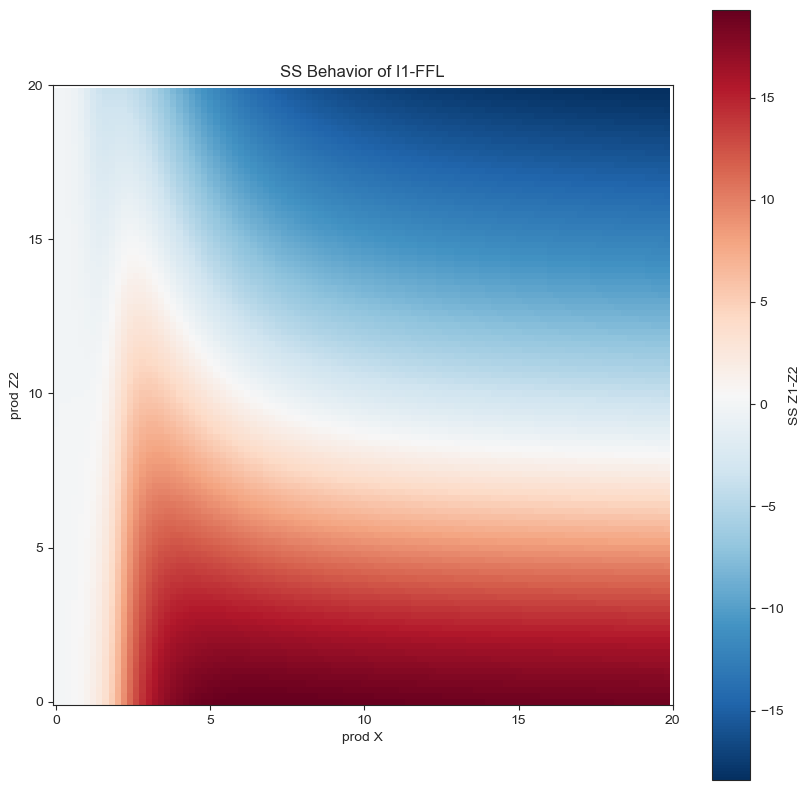

In [315]:
x_ticks = [0, 5, 10, 15, 20]
y_ticks = [0, 0.25, 0.5, 0.75, 1.0]
fig, axs = plt.subplots(figsize=(10, 10))
pc = axs.imshow(Z.T, origin='lower', cmap='RdBu_r')#, vmin=-5, vmax=5)
axs.set_xticks([0, 25, 50, 75, 100], labels=x_ticks)
axs.set_yticks([0, 25, 50, 75, 100], labels=x_ticks)
axs.set_xlabel('prod X')
axs.set_ylabel('prod Z2')
cbar = fig.colorbar(pc)
cbar.set_label('SS Z1-Z2')
axs.set_title(f'SS Behavior of I1-FFL')
plt.show()

Z1 = 15.1002513858101
Z1 = 7.0608099369385
Z1 = 6.052702910026279
Z2 = 3.300969432004018
Z2 = 12.97641454741439
Z2 = 13.865510816721072


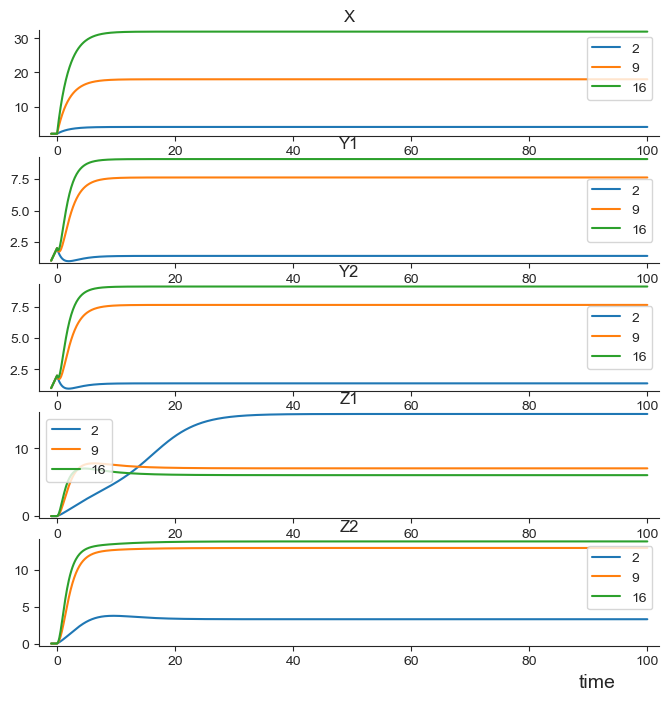

In [17]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

"""
The same thing as above but with 2 nested FFLs instead.
"""

sns.set_style('ticks')
%matplotlib inline

# Time points we want for the solution
t = np.linspace(0, 100, 1000)

# Initial condition
xyz_0 = np.array([2.0, 2.0, 2.0, 0.0, 0.0])

# Parameters
Fs = [2, 9, 16]
b, c, d, e, f, g, h, i, j, k, l = [0.5, 10.0, 1.0, 10.0, 1.0, 10.0, 10.0, 0.5, 12.0, 10.0, 0.5]
nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y = [2, 2, 2, 2, 2, 2, 2, 2, 2]
KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, KM22, KM21, KM2x, KM2y = [10.0, 10.0, 10.0, 10.0, 10.0, 5.0, 10.0, 2.5, 10.0, 10.0]


# Keeping Track of the final values:
xs = []
y1s = []
y2s = []
z1s = []
z2s = []

for F in Fs:
    # Integrate ODES
    xyz = integrate.odeint(rhs, xyz_0, t, args=(F, b, c, d, e, f, g, h, i, j, k, l, KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, 
        KM22, KM21, KM2x, KM2y, nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y))
    # Pluck out y and z
    x, y1, y2, z1, z2 = xyz.transpose()

    # Append the pre-fold change steady state
    x = np.insert(x, 0, 2.0)
    y1 = np.insert(y1, 0, 1.0)
    y2 = np.insert(y2, 0, 1.0)
    z1 = np.insert(z1, 0, 0.0)
    z2 = np.insert(z2, 0, 0.0)
    xs.append(x)
    y1s.append(y1)
    y2s.append(y2)
    z1s.append(z1)
    z2s.append(z2)
t = np.insert(t, 0, -1.0)

# Generate x
#x = 2.0 + 2.0 * (t > 0.0).astype(dtype=float)
# Plot the results
fig, ax = plt.subplots(5, 1, figsize=(8, 8))
for y in y1s:
    ax[1].set_title('Y1')
    ax[1].plot(t, y, '-')
for y in y2s:
    ax[2].set_title('Y2')
    ax[2].plot(t, y, '-')
for x in xs:
    ax[0].set_title('X')
    ax[0].plot(t, x, '-')
for z1 in z1s:
    ax[3].set_title('Z1')
    ax[3].plot(t, z1, '-')
    print(f'Z1 = {z1[-1]}')
for z2 in z2s:
    ax[4].set_title('Z2')
    ax[4].plot(t, z2, '-')
    print(f'Z2 = {z2[-1]}')
for i in range(ax.size):
#     ax[i].set_xticks([])
#     ax[i].set_yticks([])
    ax[i].margins(0.02)
    ax[i].set_xlabel('time', x=.9, fontsize=14)
    ax[i].legend(Fs)
    ax[i].yaxis.set_label_coords(-0.05, 0.9) 
sns.despine(offset=0.1)

In [11]:
# import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

"""
Perturb parameter pairs and then eventually compare parameters vs slope of dx_dt (with the parameter a)
"""


def hill_act(X, K, n):
    return X**n/(K**n + X**n)
def hill_inh(X, K, n):
    return K**n/(K**n + X**n)

def rhs(xyz, t, a, b, c, d, e, f, g, h, i, j, k, l, KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, 
        KM22, KM21, KM2x, KM2y, nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y):
    x, y1, y2, z1, z2 = xyz

    dx_dt = a - b * x
    dy1_dt = c * hill_act(x, KMxy1, nx) - d * y1
    dy2_dt = e * hill_act(x, KMxy2, nx) - f * y2
    dz1_dt = g * hill_act(x, KM1x, n1x) * hill_inh(y1, KM1y, n1y) - i * z1 + h * hill_act(z1, KM11, n11) * hill_inh(z2, KM12, n12)
    dz2_dt = j * hill_act(x, KM2x, n2x) * hill_inh(y2, KM2y, n2y) - l * z2 + k * hill_act(z2, KM22, n22) * hill_inh(z1, KM21, n21)
    
    return np.array([dx_dt, dy1_dt, dy2_dt, dz1_dt, dz2_dt])

def calc(a, z1_0, z2_0):
    """
    Brute Force Monte Carlo Parameter Sensitivity Analysis
    """
    # Time points we want for the solution
    t = np.linspace(0, 10, 1000)
   
    # Initial condition
    xyz_0 = np.array([2.0, 2.0, 2.0, z1_0, z2_0])

    # Parameters
    b, c, d, e, f, g, h, i, j, k, l = [0.5, 10.0, 1.0, 10.0, 1.0, 10, 10.0, 0.5, 10, 10.0, 0.5]
    nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y = [2, 2, 2, 2, 2, 2, 2, 2, 2]
    KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, KM22, KM21, KM2x, KM2y = [10.0, 10.0, 10.0, 10.0, 10.0, 5.0, 10.0, 2.5, 10.0, 10.0]


    # Integrate ODES
    xyz = integrate.odeint(rhs, xyz_0, t, args=(a, b, c, d, e, f, g, h, i, j, k, l, KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, 
        KM22, KM21, KM2x, KM2y, nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y))
    x, y1, y2, z1, z2 = xyz.transpose()
    return z1[-1], z2[-1]

y1array=np.linspace(0.1,20,100)
y2array=np.linspace(0.1,20,100)
a_array = np.array([2, 9, 15])
z1xarray=np.empty((len(y2array),len(y1array), len(a_array)))
z2yarray=np.empty((len(y2array),len(y1array), len(a_array)))

for k,alpha in enumerate(a_array):
    for i,R1 in enumerate(y1array):
        for j,R2 in enumerate(y2array):
            values = calc(a=alpha, z1_0=R1, z2_0=R2)
            z1xarray[j,i,k]=values[0]
            z2yarray[j,i,k]=values[1]

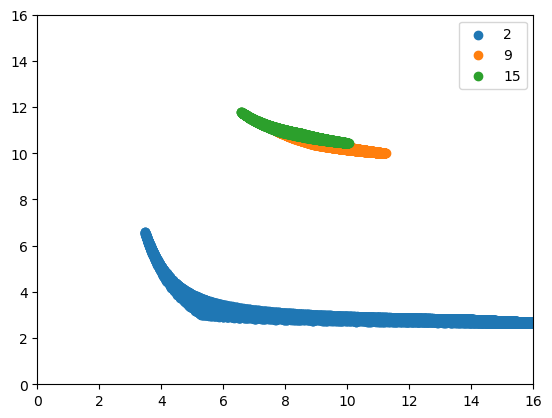

In [12]:
for k in range(z1xarray.shape[2]):
    plt.scatter(z1xarray[:,:,k], z2yarray[:,:,k])
plt.xlim([0, 16])
plt.ylim([0, 16])
plt.legend(a_array)

In [308]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import odeint
import time

# Gradient descent like function to optimize our parameters
# We can also explore genetic algorithms (these take a long time)
"""
This is a block comment
"""

def hill_act(X, K, n):
    return X**n / (K**n + X**n)

def hill_inh(X, K, n):
    return K**n / (K**n + X**n)

def rhs(xyz, t, a, b, c, d, e, f, g, h, i, j, k, l, KMxy1, KMxy2, KM11, KM12, KM1x, KM1y,
        KM22, KM21, KM2x, KM2y, nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y):
    x, y1, y2, z1, z2 = xyz

    dx_dt = a - b * x
    dy1_dt = c * hill_act(x, KMxy1, nx) - d * y1
    dy2_dt = e * hill_act(x, KMxy2, nx) - f * y2
    dz1_dt = g * hill_act(x, KM1x, n1x) * hill_inh(y1, KM1y, n1y) - i * z1 + h * hill_act(z1, KM11, n11) * hill_inh(z2, KM12, n12)
    dz2_dt = j * hill_act(x, KM2x, n2x) * hill_inh(y2, KM2y, n2y) - l * z2 + k * hill_act(z2, KM22, n22) * hill_inh(z1, KM21, n21)

    return np.array([dx_dt, dy1_dt, dy2_dt, dz1_dt, dz2_dt])

# Target function to minimize
def ode(params):
    Fs = np.arange(0, 19, 1)
    obj = 0
    for a in Fs:
        b, c, d, e, f, g, h, i, j, k, l = params[:11]
        KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, KM22, KM21, KM2x, KM2y = params[11:]
        # We don't necessarily have to adjust these.
        nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y = [2]*9
#         b, c, d, e, f, g, h, i, j, k, l = [0.5, 10.0, params[0], 10.0, params[1], 10.0, 10.0, params[2], 10.0, 10.0, params[3]]
#         nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y = [2, 2, 2, 2, 2, 2, 2, 2, 2]
#         KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, KM22, KM21, KM2x, KM2y = [10.0, 10.0, 10.0, params[8], params[6], 
#                                                                         params[4], 10.0, params[9], params[7], params[5]]
        # Time points and initial conditions
        t = np.linspace(0, 10, 100)
        initial_conditions = [0, 0, 0, 0, 0]  # Adjust initial conditions as needed, try system starts at 0s

        # Solve ODEs
        solution = odeint(rhs, initial_conditions, t, args=(a, b, c, d, e, f, g, h, i, j, k, l,
                                                            KMxy1, KMxy2, KM11, KM12, KM1x, KM1y,
                                                            KM22, KM21, KM2x, KM2y, nx, n11, n12,
                                                            n1x, n1y, n22, n21, n2x, n2y))

        # Calculate the objective values based on steady states of z1 and z2
        steady_state_z1 = solution[-1, 3]
        steady_state_z2 = solution[-1, 4]

        # Minimize negative objectives to achieve the desired behavior
        # fix these objective/cost functions to actually match what we're looking for
        if a < 9:
            obj += abs(steady_state_z1-steady_state_z2) * a * (a-18)
        else:
            obj += abs(steady_state_z2-steady_state_z1) * a * (a-18)
# #         else:
# #             obj += abs(steady_state_z1-steady_state_z2)
        #obj += 1/(steady_state_z1 - steady_state_z2) ** 2
        return obj

# Initial guess for parameters
# Use symmetrical system for initial parameters
degradation_rates = [0,2,4,7,10]

initial_params = 10 * np.random.rand(21) 
#initial_params[degradation_rates] = np.random.rand(len(degradation_rates)) * 2

# Adjust the number of parameters as needed
# Bounds for parameters (adjust as needed)
# Adjust parameter bounds
param_bounds = np.array([(1e-6, 100)] * 21)
param_bounds[degradation_rates] = (1e-6, 0.5)


# initial_params = 100 * np.random.rand(10)
# initial_params[:4] = np.random.rand(4)
# param_bounds = np.array([(0.01, 1)] * 10)
# param_bounds[4:] = (1, 100)

# Perform optimization
start_time = time.time()
result = minimize(ode, initial_params, bounds=param_bounds)

optimized_params = result.x
print("Optimized parameters:", optimized_params)
success = ['unsucessful', 'successful']
print(f'Optimization was {success[result.success]} and took {time.time()-start_time} seconds')

Optimized parameters: [0.5        5.37352557 0.5        0.15164532 0.5        3.41323608
 8.08063479 0.5        8.07576539 5.52822741 0.5        4.33834965
 7.0079098  5.77644675 5.86557976 1.17319128 5.2299828  9.7703752
 8.80489012 8.41532703 4.81912212]
Optimization was successful and took 0.004982709884643555 seconds


In [309]:
def calc(a, params, z1_0, z2_0):
    # Time points we want for the solution
    t = np.linspace(0, 10, 1000)


    # Initial condition
    xyz_0 = np.array([2.0, 2.0, 2.0, z1_0, z2_0])

    # Parameters
    b, c, d, e, f, g, h, i, j, k, l = optimized_params[:11]
    KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, KM22, KM21, KM2x, KM2y = optimized_params[11:]
    nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y = [2]*9
    
#     b, c, d, e, f, g, h, i, j, k, l = [0.5, 10.0, optimized_params[0], 10.0, optimized_params[1], 10.0, 
#                                        10.0, optimized_params[2], 10.0, 10.0, optimized_params[3]]
#     nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y = [2, 2, 2, 2, 2, 2, 2, 2, 2]
#     KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, KM22, KM21, KM2x, KM2y = [10.0, 10.0, 10.0, optimized_params[8], optimized_params[6], 
#                                                                     optimized_params[4], 10.0, optimized_params[9], 
#                                                                     optimized_params[7], optimized_params[5]]

    # Integrate ODES
    xyz = odeint(rhs, xyz_0, t, args=(a, b, c, d, e, f, g, h, i, j, k, l, KMxy1, KMxy2, KM11, KM12, KM1x, KM1y,
        KM22, KM21, KM2x, KM2y, nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y))
    x, y1, y2, z1, z2 = xyz.transpose()
    return z1[-1], z2[-1]

y1array=np.arange(0,20,1)
y2array=np.arange(0,20,1)
a_array = np.array([2, 9, 15])
a_array = np.arange(1, 20, 1)
z1xarray=np.empty((len(y2array),len(y1array), len(a_array)))
z2yarray=np.empty((len(y2array),len(y1array), len(a_array)))

for k,alpha in enumerate(a_array):
    for i,R1 in enumerate(y1array):
        for j,R2 in enumerate(y2array):
            values = calc(a=alpha,params = optimized_params, z1_0=R1, z2_0=R2)
            z1xarray[j,i,k]=values[0]
            z2yarray[j,i,k]=values[1]

Text(0, 0.5, 'SS Z2')

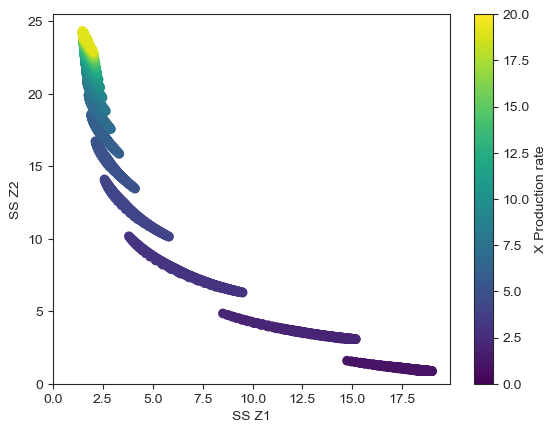

In [310]:
fig, axs = plt.subplots()
for k in range(z1xarray.shape[2]):
    #Splt.scatter(z1xarray[:,:,k], z2yarray[:,:,k], label = f'alpha = {a_array[k]}')
    a = plt.scatter(z1xarray[:,:,k], z2yarray[:,:,k], c=a_array[k]*np.ones(len(z1xarray[:,:,k]) ** 2), cmap='viridis', vmin=0, vmax=20)
fig.colorbar(a, label='X Production rate')
axs.set_xlim(0)
axs.set_ylim(0)
axs.set_xlabel('SS Z1')
axs.set_ylabel('SS Z2')
#plt.legend()

Z1 = 13.7468586385936
Z1 = 1.4902647741456119
Z1 = 1.392968311316112
Z2 = 3.3064173767735907
Z2 = 22.222366359931826
Z2 = 24.34237094170712


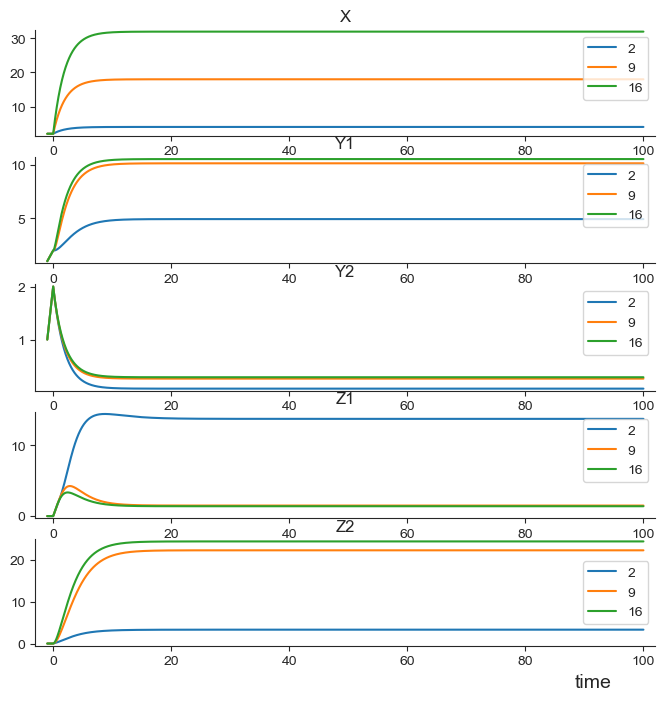

In [311]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

"""
The same thing as above but with 2 nested FFLs instead.
"""

sns.set_style('ticks')
%matplotlib inline

# Time points we want for the solution
t = np.linspace(0, 100, 1000)

# Initial condition
xyz_0 = np.array([2.0, 2.0, 2.0, 0.0, 0.0])

# Parameters
Fs = [2, 9, 16]
# b, c, d, e, f, g, h, i, j, k, l = [0.5, 10.0, optimized_params[0], 10.0, optimized_params[1], 10.0, 
#                                    10.0, optimized_params[2], 10.0, 10.0, optimized_params[3]]
# nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y = [2, 2, 2, 2, 2, 2, 2, 2, 2]
# KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, KM22, KM21, KM2x, KM2y = [10.0, 10.0, 10.0, optimized_params[8], optimized_params[6], 
#                                                                 optimized_params[4], 10.0, optimized_params[9], 
#                                                                 optimized_params[7], optimized_params[5]]
b, c, d, e, f, g, h, i, j, k, l = optimized_params[:11]
KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, KM22, KM21, KM2x, KM2y = optimized_params[11:]
nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y = [2]*9


# Keeping Track of the final values:
xs = []
y1s = []
y2s = []
z1s = []
z2s = []

for F in Fs:
    # Integrate ODES
    xyz = integrate.odeint(rhs, xyz_0, t, args=(F, b, c, d, e, f, g, h, i, j, k, l, KMxy1, KMxy2, KM11, KM12, KM1x, KM1y, 
        KM22, KM21, KM2x, KM2y, nx, n11, n12, n1x, n1y, n22, n21, n2x, n2y))
    # Pluck out y and z
    x, y1, y2, z1, z2 = xyz.transpose()

    # Append the pre-fold change steady state
    x = np.insert(x, 0, 2.0)
    y1 = np.insert(y1, 0, 1.0)
    y2 = np.insert(y2, 0, 1.0)
    z1 = np.insert(z1, 0, 0.0)
    z2 = np.insert(z2, 0, 0.0)
    xs.append(x)
    y1s.append(y1)
    y2s.append(y2)
    z1s.append(z1)
    z2s.append(z2)
t = np.insert(t, 0, -1.0)

# Generate x
#x = 2.0 + 2.0 * (t > 0.0).astype(dtype=float)
# Plot the results
fig, ax = plt.subplots(5, 1, figsize=(8, 8))
for y in y1s:
    ax[1].set_title('Y1')
    ax[1].plot(t, y, '-')
for y in y2s:
    ax[2].set_title('Y2')
    ax[2].plot(t, y, '-')
for x in xs:
    ax[0].set_title('X')
    ax[0].plot(t, x, '-')
for z1 in z1s:
    ax[3].set_title('Z1')
    ax[3].plot(t, z1, '-')
    print(f'Z1 = {z1[-1]}')
for z2 in z2s:
    ax[4].set_title('Z2')
    ax[4].plot(t, z2, '-')
    print(f'Z2 = {z2[-1]}')
for i in range(ax.size):
#     ax[i].set_xticks([])
#     ax[i].set_yticks([])
    ax[i].margins(0.02)
    ax[i].set_xlabel('time', x=.9, fontsize=14)
    ax[i].legend(Fs)
    ax[i].yaxis.set_label_coords(-0.05, 0.9) 
sns.despine(offset=0.1)